<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

I'm adding to the assignment that when you have already done what's asked of you there, before you move onto the other stretch goals, that:
You also practice some 1-sample t-tests
You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 19:27:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-16 19:27:32 (285 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
#y/n to numbers, ? to NaN
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [22]:
#separate dataframes for dems and GOPs
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

rep.shape,dem.shape

((168, 17), (267, 17))

In [7]:
#remember null values!
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [10]:
#describe crime votes
rep['crime'].describe(), dem['crime'].describe()

(count    161.000000
 mean       0.981366
 std        0.135649
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: crime, dtype: float64, count    257.000000
 mean       0.350195
 std        0.477962
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: crime, dtype: float64)

In [16]:
#check crime votes
rep['crime'].value_counts(dropna=False),dem['crime'].value_counts(dropna=False)

(1.0    158
 NaN      7
 0.0      3
 Name: crime, dtype: int64, 0.0    167
 1.0     90
 NaN     10
 Name: crime, dtype: int64)

In [8]:
#ttest crime 
ttest_ind(rep['crime'], dem['crime'], nan_policy='omit')

Ttest_indResult(statistic=16.342085656197696, pvalue=9.952342705606092e-47)

With a p value of 9.952*10^-47, we reject the null hypothesis that Democrats and Republicans voted for the crime bill at the same rate. Sampled Republicans voted for it 94% of the time (158/168), while sampled Democrats voted for it 34% of the time (90/267).

In [23]:
#describe aid to contras votes
rep['aid-to-contras'].describe(), dem['aid-to-contras'].describe()

(count    157.000000
 mean       0.152866
 std        0.361010
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: aid-to-contras, dtype: float64, count    263.000000
 mean       0.828897
 std        0.377317
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: aid-to-contras, dtype: float64)

In [25]:
#check aid to contras votes
rep['aid-to-contras'].value_counts(dropna=False),dem['aid-to-contras'].value_counts(dropna=False)

(0.0    133
 1.0     24
 NaN     11
 Name: aid-to-contras, dtype: int64, 1.0    218
 0.0     45
 NaN      4
 Name: aid-to-contras, dtype: int64)

In [27]:
#ttest aid to contras
ttest_ind(rep['aid-to-contras'], dem['aid-to-contras'], nan_policy='omit')

Ttest_indResult(statistic=-18.052093200819733, pvalue=2.82471841372357e-54)

With a p value of 2.82*10^-54, we reject the null hypothesis that Democrats and Republicans voted for the aid to contras bill at the same rate. Sampled Republicans voted for it 14% of the time (24/168), while sampled Democrats voted for it 81% of the time (218/267).

In [30]:
#check water project votes
rep['water-project'].value_counts(dropna=False),dem['water-project'].value_counts(dropna=False)

(1.0    75
 0.0    73
 NaN    20
 Name: water-project, dtype: int64, 1.0    120
 0.0    119
 NaN     28
 Name: water-project, dtype: int64)

In [48]:
#ttest water project
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

With a p value of 0.929, we fail to reject the null hypothesis that Democrats and Republicans voted for the water project bill at the same rate. Sampled Republicans voted for it 45% of the time (75/168), and sampled Democrats also voted for it 45% of the time (120/267).



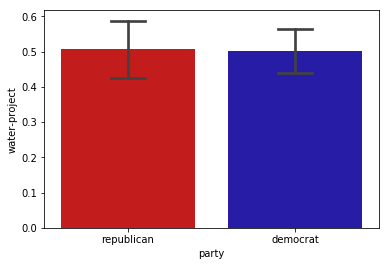

In [44]:
#a plot of the water project vote
politics = sns.color_palette(["#DE0100","#1405BD"])
sns.set_palette(politics)

ax = sns.barplot(x="party",y="water-project",data=df,
                 capsize=.2)

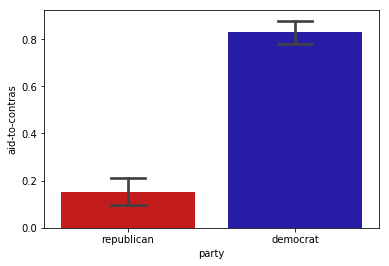

In [45]:
#a plot of the aid to contras vote

ax = sns.barplot(x="party",y="aid-to-contras",data=df,
                 capsize=.2)

In [46]:
#one-sample ttest: did congresscritters vote for the water project at a rate of 50%
ttest_1samp(df['water-project'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=0.1523059926090089, pvalue=0.8790251758107558)

With a p value of 0.879, we fail to reject the null hypothesis that the chamber voted for the water project bill at a rate of 50%

In [0]:
#Refactor your code into functions so it's easy to rerun with arbitrary variables

def partisan(bill, standard): #bill is the name of the bill under consideration, standard is p value
  return ttest_ind(rep[bill], dem[bill], nan_policy='omit').pvalue < standard
#returns a bool indicating whether the ttest's p value was under the standard
#that is, whether Democrats and Republicans voted at different rates

In [52]:
partisan("water-project", .05), partisan("aid-to-contras", .05)

(False, True)